### Molecular dynamics coding practice
Set up material parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Material parameters
ms = 0.5       # Mass
rm = 0.1       # Reference radius
eps = 0.25     # Strength
epsW = 0.1

Set up simulation conditions

In [2]:
# Simulation parameters
Nstp = 100001   # Number of steps
dt = 0.00005    # Time step size
npart = 64         # Number of atoms

# Domain size
Lx = 1.0        # Domain size in x direction
Ly = 1.0        # Domain size in y direction
rcut = 2.5 * rm  # Cutoff radius

 Set up arrays for storing data

In [3]:

# Initializing arrays
X_Y = np.random.rand(npart, 2) * np.array([Lx, Ly])  # Random initial positions
Vel = (np.random.rand(npart, 2) - 0.5) * 0.5  # Initial velocities
Acc = np.zeros((npart, 2))  # Accelerations
dst = np.zeros((npart, npart))   # Inter-atom distance matrix (npart x npart)

dX = np.zeros((npart, npart))    # Delta_X for direction (npart x npart)
dY = np.zeros((npart, npart))    # Delta_Y for direction (npart x npart)
frcX = np.zeros((npart, npart))  # Force in the x-direction (npart x npart)
frcY = np.zeros((npart, npart))  # Force in the y-direction (npart x npart)

frwX = np.zeros(npart)        # Force in the x-direction (npart x 1)
frwY = np.zeros(npart)        # Force in the y-direction (npart x 1)

# Initialize velocity with random values between -0.25 and 0.25
Vel = (np.random.rand(npart, 2) - 0.5) * 0.5

# Copy acceleration to Acc_old
Acc_old = np.copy(Acc)

Initial condition for atom positions

In [4]:
for i in range(1, npart + 1):
    rr = np.floor(i / 9)
    cl = i % 9

    X_Y[i - 1, 0] = 0.1 + (cl - 1) * 0.1122 + 0.015
    X_Y[i - 1, 1] = 0.1 + rr * 0.1122 + 0.015

time iterations

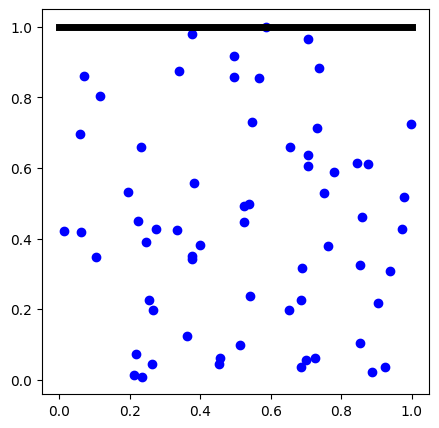

<Figure size 500x500 with 0 Axes>

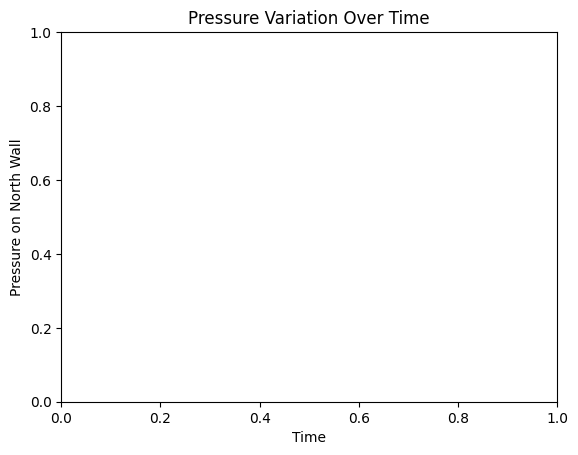

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Material parameters
ms = 0.5       # Mass
rm = 0.1       # Reference radius
eps = 0.25     # Strength
epsW = 0.1     # Wall interaction strength

# Simulation parameters
Nstp = 100001   # Number of steps
dt = 0.00005    # Time step size
npart = 64      # Number of atoms

# Domain size
Lx = 1.0        # Domain size in x direction
Ly = 1.0        # Domain size in y direction
rcut = 2.5 * rm  # Cutoff radius

# Initializing arrays
X_Y = np.random.rand(npart, 2) * np.array([Lx, Ly])  # Random initial positions
Vel = (np.random.rand(npart, 2) - 0.5) * 0.5  # Initial velocities
Acc = np.zeros((npart, 2))  # Accelerations
Acc_old = np.copy(Acc)

# Force arrays
dst = np.zeros((npart, npart))
dX = np.zeros((npart, npart))
dY = np.zeros((npart, npart))
frcX = np.zeros((npart, npart))
frcY = np.zeros((npart, npart))
frwX = np.zeros(npart)
frwY = np.zeros(npart)

# Initialize tracking arrays
hit = np.zeros(npart)
PY = []
TM = []

# Simulation loop
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, Lx)
ax.set_ylim(0, 1)

for iter in range(2501):
    # Update positions
    X_Y += Vel * dt + 0.5 * Acc * dt**2

    # Apply bounce-back conditions
    for i in range(npart):
        if X_Y[i, 0] < 0:
            X_Y[i, 0] = -X_Y[i, 0]
            Vel[i, 0] = -Vel[i, 0]
        elif X_Y[i, 0] > Lx:
            X_Y[i, 0] = 2 * Lx - X_Y[i, 0]
            Vel[i, 0] = -Vel[i, 0]
        if X_Y[i, 1] < 0:
            X_Y[i, 1] = -X_Y[i, 1]
            Vel[i, 1] = -Vel[i, 1]
        elif X_Y[i, 1] > Ly:
            X_Y[i, 1] = 2 * Ly - X_Y[i, 1]
            Vel[i, 1] = -Vel[i, 1]

    # Compute pressure on the top wall
    pressure = np.sum(frwY[hit == 1]) / Lx
    PY.append(pressure)
    TM.append(iter * dt)

    # Visualization every 250 iterations
    if iter % 250 == 0:
        plt.scatter(X_Y[:, 0], X_Y[:, 1], c='b')
        plt.plot([0, Lx], [Ly, Ly], 'k-', linewidth=5)
        plt.plot([0.5, 0.5], [1, Ly], 'k-', linewidth=10)
        clear_output(wait=True)
        display(fig)
        fig.clear()
        time.sleep(0.0002)

# Plot pressure over time
plt.figure()
plt.xlabel("Time")
plt.ylabel("Pressure on North Wall")
plt.title("Pressure Variation Over Time")
plt.show()


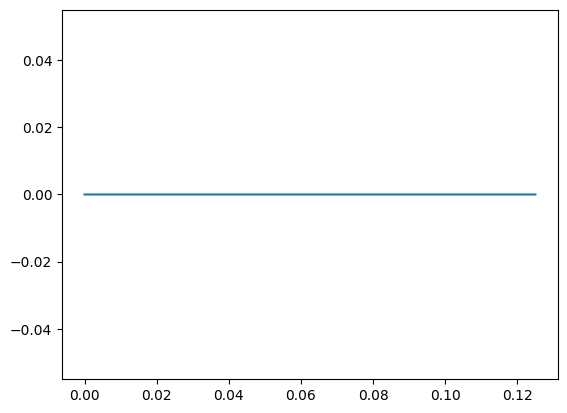

In [8]:
plt.plot(TM,PY)